In [57]:
library(FactoMineR)
library(factoextra)
library(corrplot)
library(NbClust)
library(cluster)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(randomForest)
library(mlbench)
library(caret)


In [58]:
all_data_f = "../otu_data/WaterQualityData/matched_cleaned_data/all_mdata_colset_2.tsv"
all_df <- read.delim(all_data_f, row.names=1)
transect_data_f = "../otu_data/WaterQualityData/matched_cleaned_data/transect_mdata_colset_1.tsv"
tran_df <- read.delim(transect_data_f, row.names=1)
print(dim(tran_df))
print(dim(all_df))


[1] 180  45
[1] 290  24


In [59]:
active_tran = c('WTEMP', 'SALINITY', 'DO', 'DOP', 'NO2F', 'PC', 'PHEO', 'NO3F', 'NH4F', 'TP', 'CHLA', 'PH')
active_all = c("WTEMP", "SALINITY", "DO", "PH")

all_active <- all_df[,active_all]
tran_active <- tran_df[,active_tran]

print(dim(all_active))
print(dim(tran_active))
print(colnames(tran_df))

[1] 290   4
[1] 180  12
 [1] "StationName"              "depth_float"             
 [3] "Latitude"                 "Longitude"               
 [5] "RawCount"                 "TrimCount"               
 [7] "CollectionAgency"         "sequencing_ID"           
 [9] "Month"                    "Year"                    
[11] "Month_Year"               "julian_day"              
[13] "day_length"               "anti_day_length"         
[15] "julian_seconds"           "Depth_Percentage"        
[17] "Discharge_James_14"       "Discharge_Susquehanna_14"
[19] "enspie"                   "faith_pd"                
[21] "TON"                      "TP"                      
[23] "TN"                       "PN"                      
[25] "PP"                       "PC"                      
[27] "TSS"                      "NO2F"                    
[29] "DON"                      "DIN"                     
[31] "NH4F"                     "NO23F"                   
[33] "DOP"                      

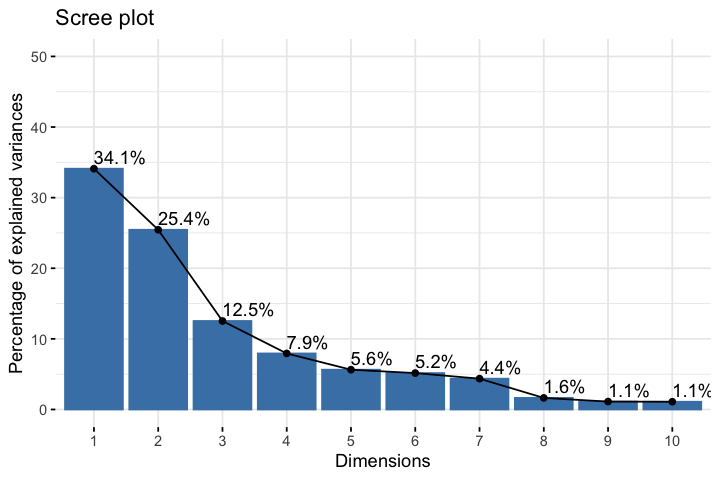

In [95]:
?PCA
res.pca <- PCA(tran_active, graph = FALSE)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

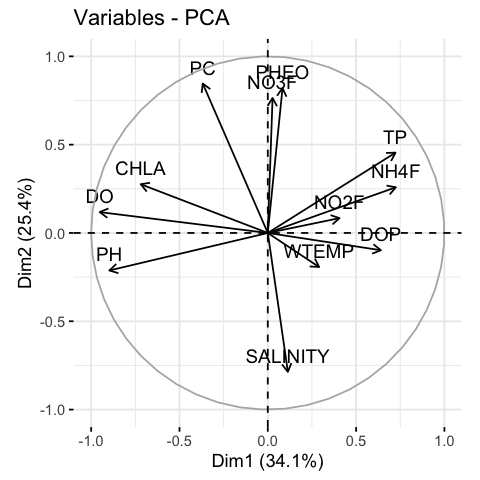

In [61]:
fviz_pca_var(res.pca, axes = c(1, 2), col.var = "black")


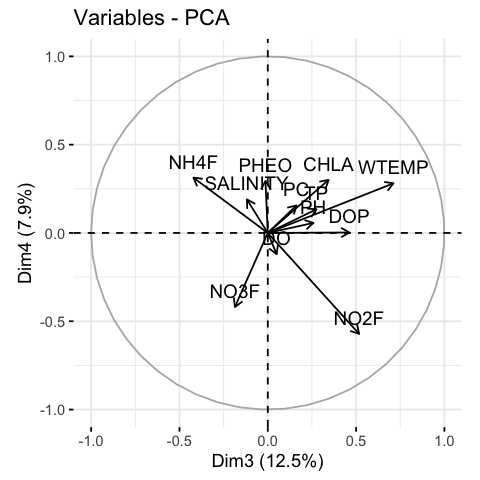

In [62]:
fviz_pca_var(res.pca, axes = c(3, 4), col.var = "black")

[1] "matrix"

[1] "matrix"

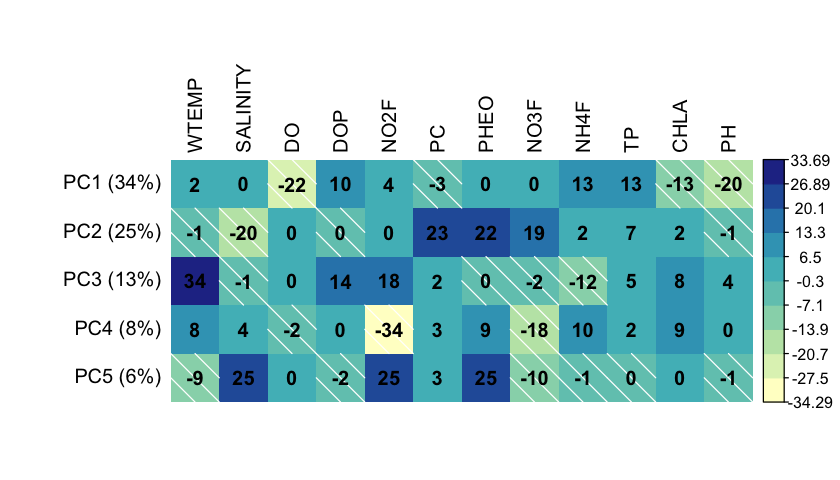

In [105]:
options(repr.plot.width=7, repr.plot.height=4)

var <- get_pca_var(res.pca)
coord_plot = t(var$coord)
coord_plot[coord_plot > 0] = 1
coord_plot[coord_plot < 0 ] = -1
contrib_plot = t(var$contrib)
class(contrib_plot)
class(coord_plot)

signed_coords = contrib_plot*coord_plot

rownames(signed_coords) <- paste("PC", 1:5, " (", round(res.pca$eig[1:5, 'percentage of variance']), "%)", sep="")

corrplot(signed_coords, method='shade', is.corr=FALSE, addCoef.col='black', tl.col = "black", number.digits=0,
         col=colorRampPalette(c("#FFFFCC","#C7E9B4","#7FCDBB","#40B6C4","#2C7FB8" ,"#253494"))(10))


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


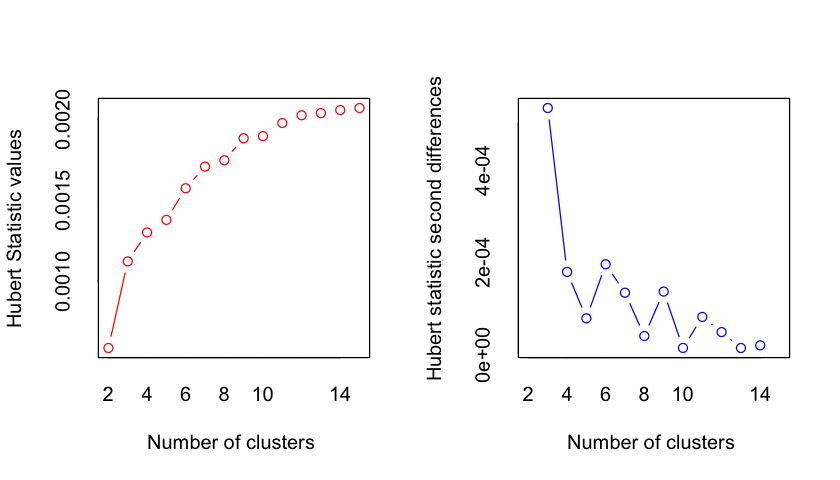

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 9 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* Ac

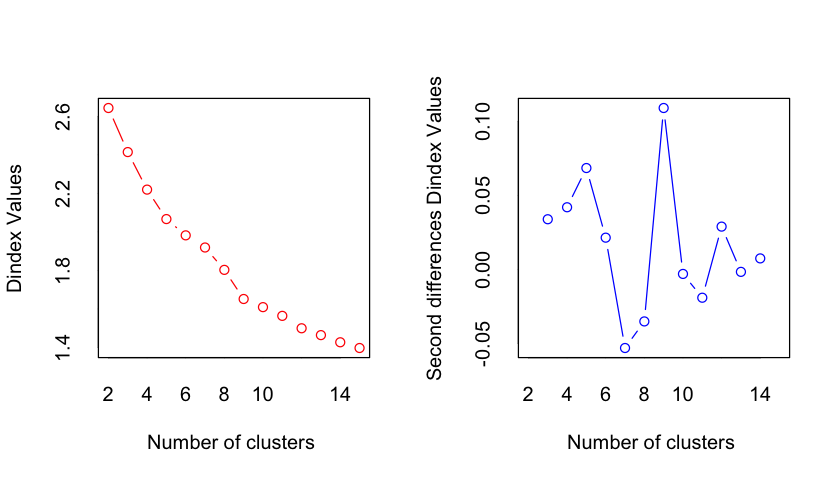

In [106]:
tran_active_sc <- scale(tran_active)
number <- NbClust(tran_active_sc, distance="euclidean", min.nc=2, max.nc=15, method='ward.D2', index='all')

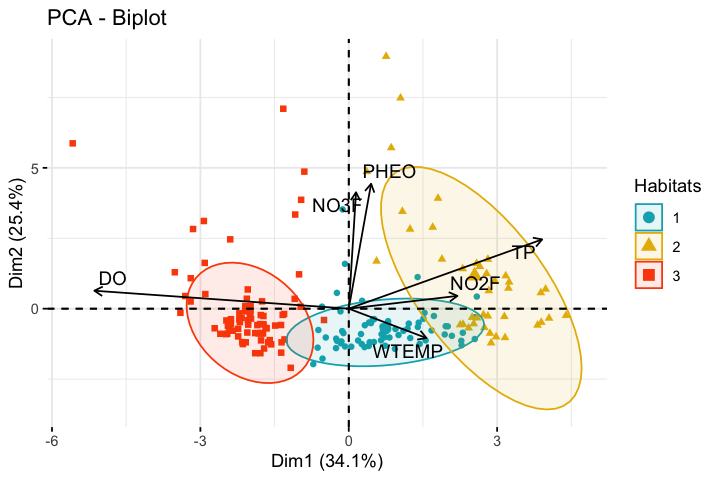

In [139]:
options(repr.plot.width=6, repr.plot.height=4)
pam.res <- pam(tran_active_sc, 3, diss=FALSE, metric='euclidean')
fviz_pca_biplot(res.pca,
              geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(pam.res$clustering), # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "t",# Concentration ellipses
             legend.title = "Habitats",
             select.var = list(name = c('SPCOND', 'PHEO', 'WTEMP', 'NO2F', 'TP', 'NO3F', 'DO')),
             repel = TRUE, col.var = "black")

In [114]:
tran_df[,'depth_segment'] <- NA
tran_df[which(tran_df[,'StationName'] != 'CB33C' & tran_df$depth_float > 2), 'depth_segment'] = 'Bottom'
tran_df[which(tran_df$depth_float < 2), 'depth_segment'] = 'Top'
tran_df[which(tran_df[,'StationName'] == 'CB33C' & tran_df$depth_float > 17), 'depth_segment'] = 'Bottom'
tran_df[,'depth_segment'] = factor(tran_df[,'depth_segment'], levels=c('Top', 'Bottom'))
print(sum(is.na(tran_df[,'depth_segment'])))
table(tran_df$depth_segment)

[1] 0



   Top Bottom 
    58    122 

,X,Y,hab
,<dbl>,<dbl>,<fct>
SB071116TAWCSCB22D11BR2TR2I616,-0.07692436,1.5913201,1
SB071116TAWCSCB33CD24BR1TR2I611,2.42334241,-0.6852750,2
SB071116TAWCSCB43CD26BR1TR1I151,2.27563931,-1.1402986,1
SB071116TAWCSCB51D33BR1TR1I153,2.97940237,-1.0005505,2
SB071116TAWCSCB52D29BR1TR2I619,1.24363391,-1.0412248,1
SB071116TAWCSCB53D25BR2TR2I615,0.68322193,-0.6319784,1


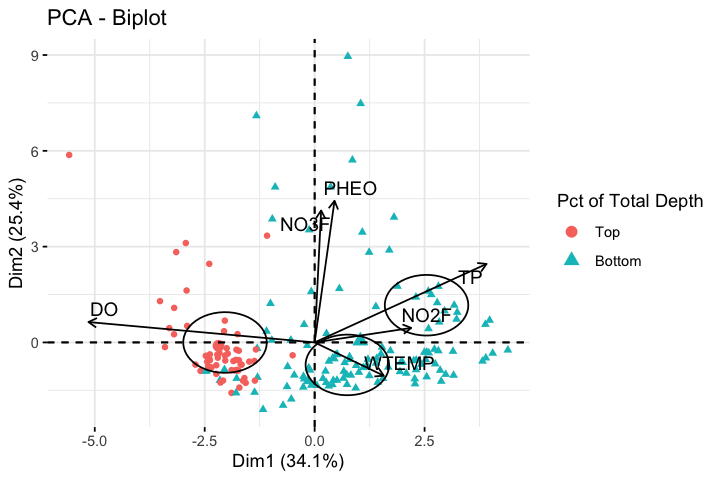

In [134]:
options(repr.plot.width=6, repr.plot.height=4)
p = fviz_pca_biplot(res.pca, label ="var", col.var = "black",
                geom.ind = "point", # show points only (nbut not "text")
                col.ind = tran_df[,'depth_segment'], # color by groups
                gradient.cols = c("#00AFBB", "#FC4E07"),
                legend.title = "Pct of Total Depth",
                select.var = list(name = c('SPCOND', 'PHEO', 'WTEMP', 'NO2F', 'TP', 'NO3F', 'DO')),
                repel = TRUE)

ellipsedf = cbind.data.frame(res.pca$ind$coord[,1:2], as.factor(pam.res$clustering))
colnames(ellipsedf) <- c('X', 'Y', 'hab')
head(ellipsedf)
#p + stat_ellipse(data=ellipsedf, aes(x=X, y=Y,group=hab),type = "euclid") 
p + 

In [140]:
# extract the classification
n_clusts = length(unique(pam.res$clustering))
habitat = as.data.frame(pam.res$clustering)
table(habitat)
colnames(habitat) <- 'HABITAT'
habitat$HABITAT <- factor(habitat$HABITAT)

# add a few more variables of interest
active_tran_plus = c(active_tran, 'day_length', 'Depth_Percentage', 'Latitude')
tran_active_plus =  tran_df[rownames(habitat), active_tran_plus]

mean_cols = vector(length=n_clusts); iqr_cols = vector(length=n_clusts)
for (i in 1:n_clusts){
    mean_cols[[i]] = paste(as.character(i), "Med")
    iqr_cols[[i]] = paste(as.character(i), "IQR", sep = "-")
    }

clust_med = aggregate(x=tran_active_plus, by=habitat, FUN=median)
print(mean_cols)
rownames(clust_med) <- mean_cols

clust_sd = aggregate(x=tran_active_plus, by=habitat, FUN=IQR)
print(iqr_cols)
rownames(clust_sd) <- iqr_cols

clust_data = rbind(clust_med, clust_sd)

clust_data[,1] <- NULL
#for (cn in colnames(clust_data)){
#    clust_data[mean_cols,cn] = round(((clust_data[mean_cols,cn]-mean(tran_active_plus[,cn]))/sd(tran_active_plus[,cn])), 2)
#    clust_data[iqr_cols,cn] = round((clust_data[iqr_cols,cn])/sd(tran_active_plus[,cn]), 2)
#    clust_data['separation',cn] <- sum(abs(clust_data[mean_cols,cn]))
#}

for (cn in colnames(clust_data)){
    clust_data[mean_cols,cn] = round(((clust_data[mean_cols,cn])), 2)
    clust_data[iqr_cols,cn] = round(clust_data[iqr_cols,cn], 2)
#    clust_data['separation',cn] <- sum(abs(clust_data[mean_cols,cn]))
}


clust_data_t = as.data.frame(t(clust_data[sort(rownames(clust_data)),]))
#print(sum(clust_data_t$separation))
#clust_data_t_view = clust_data_t[order(-clust_data_t$separation),]

clust_data_t[c('DO', 'Depth_Percentage',
                    'SALINITY', 'WTEMP', 'NO3F',
                    'PC', 'CHLA', 'NH4', 'NO2F',
                     'PH'),]


habitat
 1  2  3 
66 40 74 

[1] "1 Med" "2 Med" "3 Med"
[1] "1-IQR" "2-IQR" "3-IQR"


,1 Med,1-IQR,2 Med,2-IQR,3 Med,3-IQR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DO,3.81,2.48,0.50,2.42,8.53,1.56
Depth_Percentage,0.94,0.06,0.94,0.03,0.08,0.07
SALINITY,22.50,4.55,16.05,9.39,17.04,5.83
WTEMP,24.76,2.33,25.60,3.85,22.57,12.86
NO3F,0.01,0.01,0.03,0.14,0.00,0.00
PHEO,1.37,1.08,2.10,2.86,0.72,0.99
CHLA,2.27,1.57,1.07,1.87,7.00,3.50
NH4F,0.08,0.07,0.17,0.15,0.00,0.00
NO2F,0.01,0.01,0.01,0.02,0.00,0.00


In [17]:
wcpcs = res.pca$ind$coord[,c('Dim.2')]
habitat = pam.res$clustering
active_all = c('WTEMP', 'SALINITY', 'DO', 'PH', "Latitude", 'Depth_Percentage')
test_rows <- setdiff(rownames(all_df), names(habitat))
print(c(length(test_rows), length(rownames(all_df)), length(names(habitat))))
test_dataset <- all_df[test_rows, active_all]
all_in_tran = all_df[names(habitat), active_all] 

simple_dataset = cbind(all_in_tran, factor(habitat), wcpcs)
colnames(simple_dataset) <- c(active_all, 'HABITAT', 'PrinComp2')

print(str(simple_dataset))
print(str(test_dataset))

col

[1] 110 290 180
'data.frame':	180 obs. of  8 variables:
 $ WTEMP           : num  26.8 22.6 23.2 22.8 24.4 ...
 $ SALINITY        : num  6.43 18.21 19.94 20.85 20.22 ...
 $ DO              : num  5.3 0.36 0.74 0.5 3.2 4.1 3.78 3.25 4.06 5.06 ...
 $ PH              : num  7.2 7.2 7.3 7.3 7.6 7.7 7.7 7.61 7.7 7.81 ...
 $ Latitude        : num  39.3 39 38.6 38.3 38.1 ...
 $ Depth_Percentage: num  0.912 0.947 0.98 0.958 0.943 ...
 $ HABITAT         : Factor w/ 3 levels "1","2","3": 1 2 1 2 1 1 1 1 1 1 ...
 $ PrinComp2       : num  1.591 -0.685 -1.14 -1.001 -1.041 ...
NULL
'data.frame':	110 obs. of  6 variables:
 $ WTEMP           : num  26.8 27.1 27.1 26.9 25.9 ...
 $ SALINITY        : num  4.86 5.96 6.72 6.67 10.1 ...
 $ DO              : num  8.1 7.18 6.47 6.86 3.15 1.4 0.14 -0.02 -0.03 -0.03 ...
 $ PH              : num  8.36 8.25 8.1 8.2 7.5 7.27 7.18 7.19 7.24 7.23 ...
 $ Latitude        : num  39 39 39 39 39 ...
 $ Depth_Percentage: num  0 0.0789 0.1184 0.1578 0.2367 ...
NULL


In [54]:
library(xgboost)
library(caret)

set.seed(100)  # For reproducibility
# Create index for testing and training data
inTrain <- createDataPartition(y = simple_dataset$HABITAT, p = 0.75, list = FALSE)
# subset power_plant data to training
training <- simple_dataset[inTrain,]
# subset the rest to test
testing <- simple_dataset[-inTrain,]

X_train = xgb.DMatrix(as.matrix(training[,colnames(test_dataset)]))
y_train = training$HABITAT
X_test = xgb.DMatrix(as.matrix(testing[,colnames(test_dataset)]))
y_test = testing$HABITAT

xgb_trcontrol = trainControl(
  method = "cv",
  number = 5,  
  allowParallel = TRUE,
  verboseIter = FALSE,
  returnData = FALSE
)

xgbGrid <- expand.grid(nrounds = (3:10)*10,  # this is n_estimators in the python code above
                       max_depth = 1:5,
                       colsample_bytree = 1,
                       ## The values below are default values in the sklearn-api. 
                       eta = (5:15)/100,
                       gamma=0,
                       min_child_weight = 1,
                       subsample = 1)
set.seed(0) 
xgb_model = train(
  X_train, y_train,  
  trControl = xgb_trcontrol,
  tuneGrid = xgbGrid,
  method = "xgbTree"
)


xgb_pred = predict(xgb_model, newdata=X_test)
confusionMatrix(table(xgb_pred, y_test))

full_X <- xgb.DMatrix(as.matrix(simple_dataset[,colnames(test_dataset)]))
full_y <- simple_dataset$HABITAT

xgb_model_f = train(
  full_X, full_y,  
  trControl = xgb_trcontrol,
  tuneGrid = xgbGrid,
  method = "xgbTree")

unknown_X <- xgb.DMatrix(as.matrix(test_dataset))

xgb_unknown_hab = predict(xgb_model_f, newdata=unknown_X)

Confusion Matrix and Statistics

        y_test
xgb_pred  1  2  3
       1 11  0  0
       2  3 10  0
       3  2  0 18

Overall Statistics
                                          
               Accuracy : 0.8864          
                 95% CI : (0.7544, 0.9621)
    No Information Rate : 0.4091          
    P-Value [Acc > NIR] : 6.207e-11       
                                          
                  Kappa : 0.8268          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.6875   1.0000   1.0000
Specificity            1.0000   0.9118   0.9231
Pos Pred Value         1.0000   0.7692   0.9000
Neg Pred Value         0.8485   1.0000   1.0000
Prevalence             0.3636   0.2273   0.4091
Detection Rate         0.2500   0.2273   0.4091
Detection Prevalence   0.2500   0.2955   0.4545
Balanced Accuracy      0.8438   0.9559   0.9615

In [56]:
max(xgb_model_f$results$Accuracy)

[1] 0.9447362

RMSE  Rsquared       MAE 
0.9477915 0.7164428 0.5815285

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
411,50,2,0.15,0,1,1,1


[1] 0.8788657

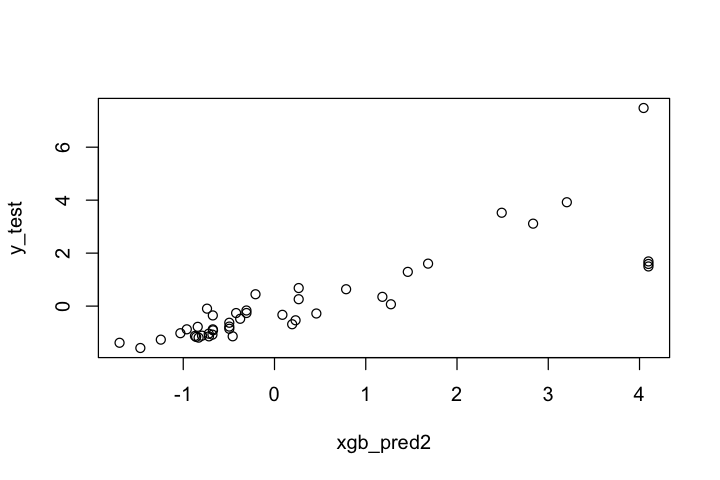

In [45]:
set.seed(2) 

y_train = training$PrinComp2
y_test = testing$PrinComp2

xgb_model2 = train(X_train, y_train, trControl = xgb_trcontrol, tuneGrid = xgbGrid,
                  method = "xgbTree")

xgb_pred2 = predict(xgb_model2, newdata=X_test)
plot(xgb_pred2, y_test)
postResample(pred = xgb_pred2, obs = y_test)
full_X <- xgb.DMatrix(as.matrix(simple_dataset[,colnames(test_dataset)]))
full_y <- simple_dataset$PrinComp2

xgb_model_f2 = train(
  full_X, full_y,  
  trControl = xgb_trcontrol,
  tuneGrid = xgbGrid,
  method = "xgbTree")

xgb_model_f2$bestTune
max(xgb_model_f2$results$Rsquared)

xgb_unknown_PR2 = predict(xgb_model_f2, newdata=unknown_X)


In [51]:
names(xgb_unknown_hab) <- rownames(test_dataset)
names(xgb_unknown_PR2) <- rownames(test_dataset)

In [52]:
ad_out = "../otu_data/WaterQualityData/matched_cleaned_data/all_mdata_with_habitat.txt"
all_df[,'habitat'] <- NA
all_df[rownames(simple_dataset),'habitat'] <- simple_dataset[,'HABITAT']
all_df[names(xgb_unknown_hab),'habitat'] <- xgb_unknown_hab

all_df[,'AC_PrinComp2'] <- NA
all_df[rownames(simple_dataset),'AC_PrinComp2'] <- simple_dataset[,'PrinComp2']
all_df[names(xgb_unknown_PR2),'AC_PrinComp2'] <- xgb_unknown_PR2

colSums(is.na(all_df[,c('habitat', 'AC_PrinComp2')]))

write.table(x = all_df,  file = ad_out, sep = '\t')


habitat AC_PrinComp2 
           0            0

In [47]:
trcontrol = trainControl(
  method = "cv",
  number = 5,  
  allowParallel = TRUE,
  verboseIter = FALSE,
  returnData = FALSE
)
tunegrid <- expand.grid(mtry=c(1:5))

fit <- train(PrinComp2~., data=simple_dataset[,c(active_all, 'PrinComp2')], method="rf", metric='Rsquared',
             tuneGrid=tunegrid, trControl=trcontrol, ntree=1500)
fit

Random Forest 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 144, 144, 144, 144, 144 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  1     0.8021243  0.8247317  0.4866054
  2     0.7240401  0.8489658  0.4384191
  3     0.7106218  0.8538948  0.4297330
  4     0.7223668  0.8513656  0.4303531
  5     0.7352490  0.8442774  0.4300095

Rsquared was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

In [ ]:
set.seed(95)
smp_size <- floor(0.75 * nrow(simple_dataset))
train_ind <- sample(seq_len(nrow(simple_dataset)), size = smp_size)
train_df <- simple_dataset[train_ind, ]
test_df <- simple_dataset[-train_ind, ]

classifier = randomForest(x = train_df[,active_all],
                          y = train_df[,'HABITAT'],
                          ntree = 1500, random_state = 0, mtry=2)

regressor_1 = randomForest(x = train_df[,active_all],
                           y = train_df[,'PrinComp1'],
                           ntree = 1500, random_state = 0, mtry=3)

regressor_2 = randomForest(x = train_df[,active_all],
                           y = train_df[,'PrinComp2'],
                           ntree = 1500, random_state = 0, mtry=2)


y_hab = predict(classifier, newdata = test_df[,active_all])
y_pc1 = predict(regressor_1, newdata = test_df[,active_all])
y_pc2 = predict(regressor_2, newdata = test_df[,active_all])

rsq <- function (x, y) cor(x, y) ^ 2

table(test_df[,'HABITAT'], y_hab)
rsq(test_df[,'PrinComp1'], y_pc1)
rsq(test_df[,'PrinComp2'], y_pc2)

In [ ]:
library(pls)
set.seed(2167)

model1 <- train(
  PrinComp1~., data = simple_dataset[,c(active_all, 'PrinComp1')], method = "pls",
  scale = TRUE,
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )

model2 <- train(
  PrinComp2~., data = simple_dataset[,c(active_all, 'PrinComp2')], method = "pls",
  scale = TRUE,
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )

plot(model1)
plot(model2)

summary(model1$finalModel)
summary(model2$finalModel)



In [ ]:
best.dims1=5
plsFit_1 = plsr(PrinComp1~., data=train_df[,c(active_all, 'PrinComp1')], validation="CV")
pls.pred1 = predict(plsFit_1, test_df[,c(active_all)], ncomp=5)

best.dims1=4
plsFit_2 = plsr(PrinComp2~., data=train_df[,c(active_all, 'PrinComp2')], validation="CV")
pls.pred2 = predict(plsFit_2, test_df[,c(active_all)], ncomp=4)

caret::R2(pls.pred1[1:dim(test_df)[1],1,1], test_df[,'PrinComp1'])
caret::R2(pls.pred2[1:dim(test_df)[1],1,1], test_df[,'PrinComp2'])


In [ ]:
y2_hab = predict(classifier, newdata=test_dataset)
y2_pr1 = predict(plsFit_1, newdata=test_dataset, ncomp=5)[,1,1]
y2_pr2 = predict(plsFit_2, newdata=test_dataset, ncomp=4)[,1,1]

dim(simple_dataset[,c('HABITAT', 'PrinComp1', 'PrinComp2')])
colSums(is.na(simple_dataset[,c('HABITAT', 'PrinComp1', 'PrinComp2')]))

length(y2_pr1)
length(y2_pr2)
length(y2_hab)
colSums(is.na(cbind(y2_pr1,y2_pr2,y2_hab)))



In [ ]:
select_cols = c('StationName', 'Year', 'Month', 'Discharge_Susquehanna_14', 'Latitude', 
                'habitat', 'enspie', 'faith_pd', 'day_length', 'CollectionAgency', 'anti_day_length',
                'Month_Year', 'WTEMP', 'SALINITY', 'DO', 'DOP', 'NO2F', 'PC', 'PHEO', 'NO3F', 'NH4F', 
                'TP', 'CHLA', 'TDN', 'AC_PrinComp1', 'AC_PrinComp2')


all_df$Year = factor(all_df$Year)
all_df$Month = factor(all_df$Month)
all_df$habitat = factor(all_df$habitat)

for (sc in select_cols){
    if (sc %in% colnames(all_df)){
        if (class(all_df[,sc]) != 'factor'){
            print(c(sc, shapiro.test(scale(all_df[,sc]))[['p.value']]))
        }
    } else {
        if (class(tran_df[,sc]) != 'factor'){
            print(c(sc, shapiro.test(scale(tran_df[,sc]))[['p.value']]))
        }
    }

}
